In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [183]:
%matplotlib notebook
plt.style.use('seaborn-notebook')

data_1 = pd.read_csv(r'C:\Users\monis\Desktop\ML-Ang\Datasets\Health_Insurance_Lead_Prediction\train_Df64byy.csv')
df1 = pd.DataFrame(data_1)

In [184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [7]:
df1.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [8]:
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')


In [185]:
df1.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
df1.groupby('Response')['ID'].count()

Response
0    38673
1    12209
Name: ID, dtype: int64

<IPython.core.display.Javascript object>


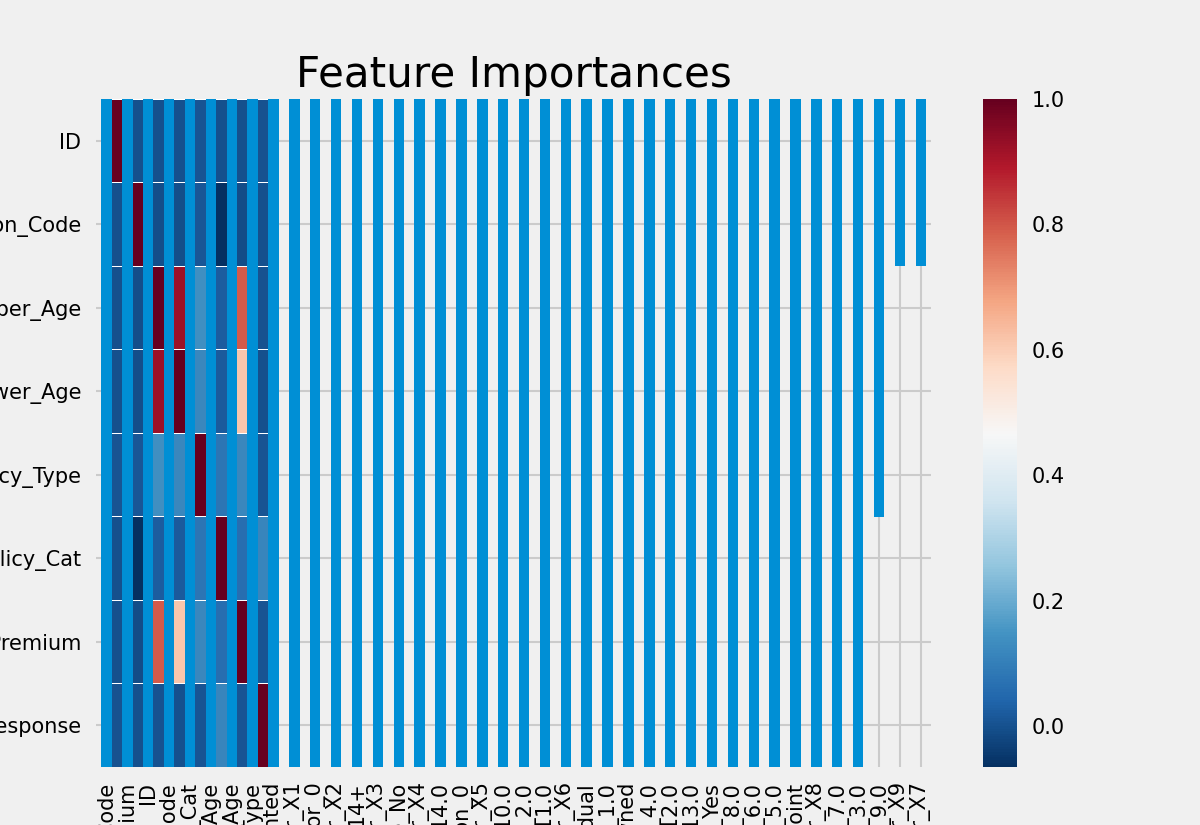

<AxesSubplot:>

In [18]:
import seaborn as sb
pearsoncorr = df1.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            #xticklabels=pearsoncorr.columns,
            #yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            #annot=True,
            linewidth=0.05)

In [186]:
for i in df1.columns:
    print(i,df1[i].unique(),'\n')

ID [    1     2     3 ... 50880 50881 50882] 

City_Code ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31'] 

Region_Code [3213 1117 3732 ... 5326 6149 5450] 

Accomodation_Type ['Rented' 'Owned'] 

Reco_Insurance_Type ['Individual' 'Joint'] 

Upper_Age [36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47] 

Lower_Age [36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17] 

Is_Spouse ['No' 'Yes'] 

Health Indicator ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9'] 

Holding_Policy_Duration ['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.

In [187]:
df1['City_Code'] = df1['City_Code'].str.lstrip('C')
df1['City_Code'] = df1['City_Code'].astype(int)
df1['City_Code']

0         3
1         5
2         5
3        24
4         8
         ..
50877     4
50878     5
50879     1
50880     1
50881     3
Name: City_Code, Length: 50882, dtype: int32

In [51]:
df1.groupby('Holding_Policy_Duration')['ID'].count().sort_values()

Holding_Policy_Duration
14.0     466
13.0     511
12.0     513
11.0     546
10.0     813
9.0     1114
8.0     1316
7.0     1645
6.0     1894
5.0     2362
4.0     2771
3.0     3586
2.0     4260
14+     4335
1.0     4499
Name: ID, dtype: int64

In [53]:
df1.groupby(['Holding_Policy_Duration', 'Response'])['ID'].count().sort_values()

Holding_Policy_Duration  Response
14.0                     1            115
12.0                     1            130
11.0                     1            137
13.0                     1            138
10.0                     1            222
9.0                      1            265
8.0                      1            338
14.0                     0            351
13.0                     0            373
12.0                     0            383
11.0                     0            409
7.0                      1            423
6.0                      1            445
5.0                      1            563
10.0                     0            591
4.0                      1            667
3.0                      1            832
9.0                      0            849
8.0                      0            978
1.0                      1            997
2.0                      1           1011
14+                      1           1087
7.0                      0           1222


In [58]:
def dummify(df, y):
    '''
    dummify(DataFrame)
    ...
    Iterates through the dataframe and returns 
    binarized categorical features (strings).
    Ignores features with int values.
    Returns value is a pandas dataframe.
    '''
    df1 = pd.DataFrame()
    for i in df.columns:
        if np.dtype(df[i]) == 'O' and i!=y:
            df[i].fillna(0, inplace=True)
            for index in range(0, len(df[i].unique())):
                df1[str(i) + '_' + str(df[i].unique()[index])] =\
                pd.get_dummies(df[i]).iloc[:,[index]]
        else:
            df1[i] = df[i]
    return df1

In [59]:
df1.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'city_code'],
      dtype='object')

In [188]:
df2 = df1[['ID','City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Upper_Age','Lower_Age','Is_Spouse','Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']].copy()

In [189]:
df3 = dummify(df2, 'Response')
df3.head()

,ID,City_Code,Region_Code,Accomodation_Type_Rented,Accomodation_Type_Owned,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Upper_Age,Lower_Age,Is_Spouse_No,...,Holding_Policy_Duration_10.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_13.0,Holding_Policy_Duration_12.0,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,3213,0,1,1,0,36,36,1,...,0,0,0,0,0,0,3.0,22,11628.0,0
1,2,5,1117,1,0,0,1,75,22,1,...,0,0,0,0,0,0,NaN,22,30510.0,0
2,3,5,3732,1,0,1,0,32,32,1,...,0,0,0,0,0,0,1.0,19,7450.0,1
3,4,24,4378,1,0,0,1,52,48,1,...,0,0,0,0,0,0,3.0,19,17780.0,0
4,5,8,2190,0,1,1,0,44,44,1,...,0,0,0,0,0,0,1.0,16,10404.0,0


In [190]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              50882 non-null  int64  
 1   City_Code                       50882 non-null  int32  
 2   Region_Code                     50882 non-null  int64  
 3   Accomodation_Type_Rented        50882 non-null  uint8  
 4   Accomodation_Type_Owned         50882 non-null  uint8  
 5   Reco_Insurance_Type_Individual  50882 non-null  uint8  
 6   Reco_Insurance_Type_Joint       50882 non-null  uint8  
 7   Upper_Age                       50882 non-null  int64  
 8   Lower_Age                       50882 non-null  int64  
 9   Is_Spouse_No                    50882 non-null  uint8  
 10  Is_Spouse_Yes                   50882 non-null  uint8  
 11  Health Indicator_X1             50882 non-null  uint8  
 12  Health Indicator_X2             

In [191]:
print(df3['Holding_Policy_Type'].isna().sum())
print(df1['Holding_Policy_Type'].isna().sum())
print(df3['Holding_Policy_Type'].unique())
print(df3['Holding_Policy_Type'].dtype)

20251
20251
[ 3. nan  1.  4.  2.]
float64


In [192]:
df3['Holding_Policy_Type'] = df3['Holding_Policy_Type'].fillna(0)
print(df3['Holding_Policy_Type'].isna().sum())

0


In [193]:
df3.isna().sum()

ID                                0
City_Code                         0
Region_Code                       0
Accomodation_Type_Rented          0
Accomodation_Type_Owned           0
Reco_Insurance_Type_Individual    0
Reco_Insurance_Type_Joint         0
Upper_Age                         0
Lower_Age                         0
Is_Spouse_No                      0
Is_Spouse_Yes                     0
Health Indicator_X1               0
Health Indicator_X2               0
Health Indicator_0                0
Health Indicator_X4               0
Health Indicator_X3               0
Health Indicator_X6               0
Health Indicator_X5               0
Health Indicator_X8               0
Health Indicator_X7               0
Health Indicator_X9               0
Holding_Policy_Duration_14+       0
Holding_Policy_Duration_0         0
Holding_Policy_Duration_1.0       0
Holding_Policy_Duration_3.0       0
Holding_Policy_Duration_5.0       0
Holding_Policy_Duration_9.0       0
Holding_Policy_Duration_14.0

In [194]:
df3[df3.columns[:]].corr()['Response'][:].sort_values(ascending=True)

Holding_Policy_Duration_0        -0.013377
Reco_Insurance_Type_Individual   -0.009891
Health Indicator_X1              -0.007354
City_Code                        -0.005424
Accomodation_Type_Owned          -0.005201
Holding_Policy_Duration_11.0     -0.005116
Is_Spouse_No                     -0.003859
Health Indicator_X4              -0.003189
Holding_Policy_Duration_6.0      -0.002300
Lower_Age                        -0.002099
Holding_Policy_Duration_14+      -0.001897
Holding_Policy_Duration_2.0      -0.001857
Health Indicator_X6              -0.001624
Health Indicator_X9              -0.001461
Health Indicator_X7              -0.000842
Holding_Policy_Duration_8.0      -0.000821
Holding_Policy_Duration_12.0     -0.000724
Health Indicator_X5              -0.000039
Holding_Policy_Duration_10.0      0.000427
Region_Code                       0.001121
Health Indicator_0                0.001357
Holding_Policy_Duration_7.0       0.001538
Health Indicator_X3               0.002615
Holding_Pol

In [195]:
df3.shape

(50882, 41)

In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

X = df3.iloc[:,0:40]  #independent columns
y = df3.iloc[:,-1] 


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

print(accuracy_score(y_test,dtree_predictions))
print(f1_score(y_test,dtree_predictions, average='weighted'))

pred_prob1 = dtree_model.predict_proba(X_test)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)



0.7552079239053534
0.6498819889787468
0.5670600421885161


In [75]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [82]:
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f1_score(y_test,y_pred, average='macro'))

print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

pred_prob2 = classifier.predict_proba(X_test)

# auc scores
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.43509697411047643
[[9573   34]
 [3097   17]]
              precision    recall  f1-score   support

           0      0.756     0.996     0.859      9607
           1      0.333     0.005     0.011      3114

    accuracy                          0.754     12721
   macro avg      0.544     0.501     0.435     12721
weighted avg      0.652     0.754     0.652     12721

0.5996621629526586


In [83]:
from xgboost import XGBClassifier

xgbcl = XGBClassifier(n_estimators=100)
xgbcl.fit(X_train,y_train)
pred_prob3 = xgbcl.predict_proba(X_test)

# auc scores
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)


[17:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6435818649147863


In [88]:
from sklearn import svm

svc = svm.SVC(probability=True)
svc.fit(X_train,y_train)
pred_prob4 = svc.predict_proba(X_test)

# auc scores
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5169688340744368


In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_prob5 = knn.predict_proba(X_test)

# auc scores
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.49937470329618755


In [103]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [197]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Response'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Response'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Response'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Response'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()


In [111]:
#Choose all predictors except Response & ID
predictors = [x for x in df3.columns if x not in ['Response']]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df3, predictors)


Model Report
Accuracy : 0.772
AUC Score (Train): 0.778578


In [116]:
target = 'Response'
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),  param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(df3[predictors],df3[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[18:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 9.97688842, 11.32102108, 10.43857379, 16.26352839, 16.53056369,
         16.10050058, 22.77303009, 22.08636889, 20.40034423, 27.880586  ,
         27.71769376, 23.12845898]),
  'std_fit_time': array([0.69993971, 0.14417684, 0.74978342, 0.16431068, 0.19780863,
         0.13165455, 0.65806407, 0.7621212 , 1.29231344, 0.99981276,
         0.1113607 , 3.61929617]),
  'mean_score_time': array([0.06149359, 0.07293506, 0.06452332, 0.07415242, 0.08070345,
         0.07405572, 0.07634921, 0.07097616, 0.0741468 , 0.08082914,
         0.08716664, 0.06981959]),
  'std_score_time': array([0.00777781, 0.00920734, 0.01051909, 0.0118663 , 0.00726846,
         0.00968032, 0.00565934, 0.011305  , 0.00510885, 0.00819711,
         0.00669024, 0.01570617]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [117]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(df3[predictors],df3[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

[18:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([16.26180849, 17.17459378, 17.32341905, 17.55426431, 12.5610888 ]),
  'std_fit_time': array([0.13407248, 0.58986663, 0.48054249, 0.5372597 , 2.40334981]),
  'mean_score_time': array([0.07361159, 0.06893883, 0.0796958 , 0.08640022, 0.06791849]),
  'std_score_time': array([0.00844258, 0.01074291, 0.01008983, 0.014663  , 0.00742088]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.65418982, 0.65923451, 0.65742165, 0.6597851 , 0.62801134]),
  'split1_test_score': array([0.65134328, 0.65140297, 0.65229707, 0.65506232, 0.62159899]),
  'split2_test_score': array([0.65325827, 0.65174067, 0.65121652, 0.65306381, 0.62240241]),
  'split3_test_score': array([0.65163918, 0.65284944, 0.6490

In [118]:
param_test7 = {
 'learning_rate':[0.01, 0.02, 0.05, 0.1, 0.2]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5)
gsearch7.fit(df3[predictors],df3[target])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

[18:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([15.86295848, 16.22381678, 15.88410196, 16.44706564, 13.90541539]),
  'std_fit_time': array([0.36821937, 0.20996494, 0.41062279, 0.18111737, 2.27637166]),
  'mean_score_time': array([0.0684454 , 0.06146426, 0.07184215, 0.07143903, 0.06048279]),
  'std_score_time': array([0.00892722, 0.0080555 , 0.01685448, 0.0079933 , 0.00921899]),
  'param_learning_rate': masked_array(data=[0.01, 0.02, 0.05, 0.1, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.01},
   {'learning_rate': 0.02},
   {'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.6246267 , 0.63239614, 0.64947826, 0.65418974, 0.65123591]),
  'split1_test_score': array([0.61534639, 0.62260575, 0.64416805, 0.65134336, 0.6520057 ]),
  'split2_test_score': array([0.61796664, 0.62436395, 0.64354391, 0.65325821, 0.64510425]),
  'split3_test_score': array([0.

In [119]:
predictors = [x for x in df3.columns if x not in ['Response', 'ID']]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
reg_alpha=1)
modelfit(xgb1, df3, predictors)


Model Report
Accuracy : 0.7739
AUC Score (Train): 0.804901


In [121]:
param_test2b = {
 'max_depth':[9,10,11,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2b.fit(df3[predictors],df3[target])
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

[18:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([27.07922211, 30.63771467, 32.58315778, 35.83416839]),
  'std_fit_time': array([0.2272179 , 0.09528584, 1.27838427, 1.61203443]),
  'mean_score_time': array([0.09341784, 0.0915277 , 0.09911222, 0.10758915]),
  'std_score_time': array([0.0117576 , 0.01249364, 0.00849568, 0.01040168]),
  'param_max_depth': masked_array(data=[9, 10, 11, 12],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 9},
   {'max_depth': 10},
   {'max_depth': 11},
   {'max_depth': 12}],
  'split0_test_score': array([0.6692408 , 0.66668255, 0.66400161, 0.66248966]),
  'split1_test_score': array([0.66789128, 0.66192949, 0.66174446, 0.66541672]),
  'split2_test_score': array([0.66946344, 0.66100107, 0.66282294, 0.6694391 ]),
  'split3_test_score': array([0.66247141, 0.65886866, 0.65821838, 0.65758605]),
  'split4_test_score': array([0.65918876, 0.6567882 , 0.66036272, 0.6579737 ]),
  'mean_test_score': array([0.66

In [122]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(df3[predictors],df3[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

[18:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([28.42026324, 28.84983206, 28.77683887, 28.43457618, 26.08653135]),
  'std_fit_time': array([0.42738476, 0.67582663, 0.3225808 , 0.27869732, 5.00210601]),
  'mean_score_time': array([0.08161864, 0.08948646, 0.09057775, 0.08458714, 0.08204665]),
  'std_score_time': array([0.01095493, 0.00392194, 0.00281745, 0.01525211, 0.00964776]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.6692408 , 0.6663963 , 0.66800068, 0.66916803, 0.66471372]),
  'split1_test_score': array([0.66789128, 0.66636038, 0.66997666, 0.67098368, 0.66805645]),
  'split2_test_score': array([0.66946344, 0.66796932, 0.66807488, 0.66749404, 0.66603226]),
  'split3_test_score': array([0.66247141, 0.65861618, 0.65942522, 0.66124748, 0.659100

In [123]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(df3[predictors],df3[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

[18:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AttributeError: 'GridSearchCV' object has no attribute 'cv_results'

In [125]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.6701086207652098)


Model Report
Accuracy : 0.7737
AUC Score (Train): 0.807009


<IPython.core.display.Javascript object>


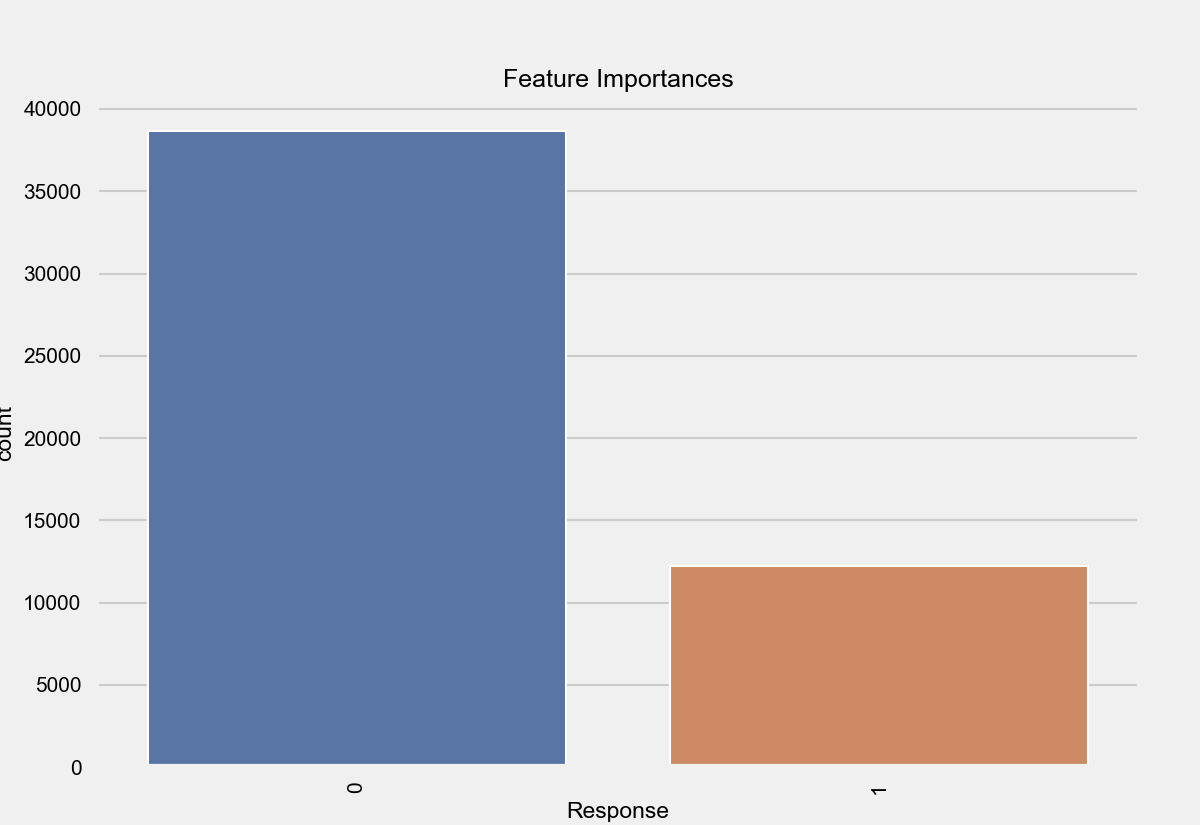

In [198]:
predictors = [x for x in df3.columns if x not in ['Response']]
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
reg_alpha=1)
modelfit(xgb2, df3, predictors)

In [176]:
data_2 = pd.read_csv(r'C:\Users\monis\Desktop\ML-Ang\Datasets\Health_Insurance_Lead_Prediction\test_YCcRUnU.csv')
test = pd.DataFrame(data_2)

In [164]:
for i in test.columns:
    print(i,test[i].unique(),'\n')

ID [50883 50884 50885 ... 72685 72686 72687] 

City_Code ['C1' 'C4' 'C3' 'C2' 'C13' 'C18' 'C16' 'C17' 'C11' 'C7' 'C21' 'C34' 'C14'
 'C8' 'C12' 'C6' 'C10' 'C9' 'C23' 'C32' 'C26' 'C15' 'C24' 'C20' 'C19' 'C5'
 'C28' 'C30' 'C25' 'C29' 'C27' 'C33' 'C22' 'C36' 'C35' 'C31'] 

Region_Code [ 156    7  564 ... 4778 4555 5204] 

Accomodation_Type ['Owned' 'Rented'] 

Reco_Insurance_Type ['Individual' 'Joint'] 

Upper_Age [30 69 28 23 75 24 56 41 22 38 42 31 35 46 44 29 60 54 27 71 68 55 36 59
 72 33 47 63 45 66 26 67 64 57 51 37 70 25 65 34 21 52 61 58 49 43 48 40
 50 39 32 53 62 19 20 18 74 73] 

Lower_Age [30 68 28 23 75 24 56 41 22 37 38 42 31 35 44 29 60 54 27 71 66 36 26 47
 63 45 59 67 64 57 43 46 61 25 70 69 65 72 55 34 21 52 19 58 33 53 49 48
 40 50 39 32 17 51 74 62 20 18 73 16] 

Is_Spouse ['No' 'Yes'] 

Health Indicator [nan 'X1' 'X3' 'X2' 'X5' 'X4' 'X7' 'X6' 'X9' 'X8'] 

Holding_Policy_Duration ['6.0' '3.0' '2.0' nan '14+' '5.0' '1.0' '4.0' '12.0' '11.0' '7.0' '9.0'
 '13.0' '8.0' '14.

In [177]:
test['City_Code'] = test['City_Code'].str.lstrip('C')
test['City_Code'] = test['City_Code'].astype(int)
test['City_Code']

0         1
1         4
2         1
3         3
4         1
         ..
21800     3
21801     4
21802    12
21803    10
21804     2
Name: City_Code, Length: 21805, dtype: int32

In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  int32  
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 2.1+ MB


In [179]:
test['Response']=0
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,50883,1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0,0
1,50884,4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0
2,50885,1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,0
3,50886,3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,0
4,50887,1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0,0


In [180]:
test = dummify(test, 'Response')
print(test.isna().sum())
test.head()

ID                                   0
City_Code                            0
Region_Code                          0
Accomodation_Type_Owned              0
Accomodation_Type_Rented             0
Reco_Insurance_Type_Individual       0
Reco_Insurance_Type_Joint            0
Upper_Age                            0
Lower_Age                            0
Is_Spouse_No                         0
Is_Spouse_Yes                        0
Health Indicator_0                   0
Health Indicator_X1                  0
Health Indicator_X3                  0
Health Indicator_X2                  0
Health Indicator_X5                  0
Health Indicator_X4                  0
Health Indicator_X7                  0
Health Indicator_X6                  0
Health Indicator_X9                  0
Health Indicator_X8                  0
Holding_Policy_Duration_6.0          0
Holding_Policy_Duration_3.0          0
Holding_Policy_Duration_2.0          0
Holding_Policy_Duration_0            0
Holding_Policy_Duration_1

,ID,City_Code,Region_Code,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Upper_Age,Lower_Age,Is_Spouse_No,...,Holding_Policy_Duration_7.0,Holding_Policy_Duration_9.0,Holding_Policy_Duration_13.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_14.0,Holding_Policy_Duration_10.0,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,50883,1,156,1,0,1,0,30,30,1,...,0,0,1,0,0,0,3.0,5,11934.0,0
1,50884,4,7,1,0,0,1,69,68,0,...,0,0,0,0,0,0,3.0,18,32204.8,0
2,50885,1,564,0,1,1,0,28,28,1,...,0,0,0,0,0,0,4.0,17,9240.0,0
3,50886,3,1177,0,1,1,0,23,23,1,...,0,0,0,0,0,0,3.0,18,9086.0,0
4,50887,1,951,1,0,1,0,75,75,1,...,0,0,0,0,0,0,NaN,5,22534.0,0


In [181]:
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(0)
print(test['Holding_Policy_Type'].isna().sum())

0


In [202]:
test_df = test[df3.columns]

In [203]:
test_df

,ID,City_Code,Region_Code,Accomodation_Type_Rented,Accomodation_Type_Owned,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Upper_Age,Lower_Age,Is_Spouse_No,...,Holding_Policy_Duration_10.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_13.0,Holding_Policy_Duration_12.0,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,50883,1,156,0,1,1,0,30,30,1,...,0,0,0,0,1,0,3.0,5,11934.0,0
1,50884,4,7,0,1,0,1,69,68,0,...,0,0,0,0,0,0,3.0,18,32204.8,0
2,50885,1,564,1,0,1,0,28,28,1,...,0,0,0,0,0,1,4.0,17,9240.0,0
3,50886,3,1177,1,0,1,0,23,23,1,...,0,0,0,0,0,0,3.0,18,9086.0,0
4,50887,1,951,0,1,1,0,75,75,1,...,0,0,1,0,0,0,0.0,5,22534.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,3,1044,0,1,1,0,45,45,1,...,0,0,0,0,0,0,1.0,18,15884.0,0
21801,72684,4,266,0,1,1,0,59,59,1,...,0,0,0,0,1,0,3.0,18,21390.0,0
21802,72685,12,2470,0,1,1,0,74,74,1,...,0,0,1,0,0,0,0.0,1,17836.0,0
21803,72686,10,1676,1,0,1,0,25,25,1,...,0,0,0,0,0,0,1.0,19,11568.0,0


In [207]:
final_test = test_df.drop('Response', axis=1)
test_prediction = xgb2.predict(final_test)
print(test_prediction)
test_prediction.shape

[0 0 0 ... 0 0 0]


(21805,)

In [215]:
test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [212]:
submission_df = pd.DataFrame(final_test['ID'], columns=['ID'])
submission_df['Response'] = test_prediction 

In [213]:
submission_df.to_csv('C:\\Users\\monis\\Desktop\\ML-Ang\\Datasets\\Health_Insurance_Lead_Prediction\\submission_01.csv', index=False)

#### Feature Engineering

<AxesSubplot:xlabel='Response', ylabel='count'>

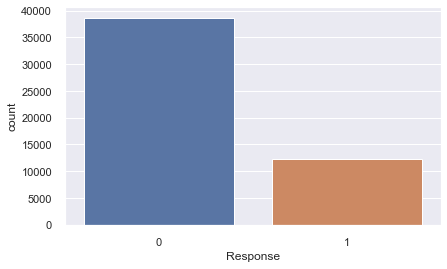

In [221]:
%matplotlib inline

sns.set_theme(style="darkgrid")
sns.countplot(df3['Response'],data=df3)


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

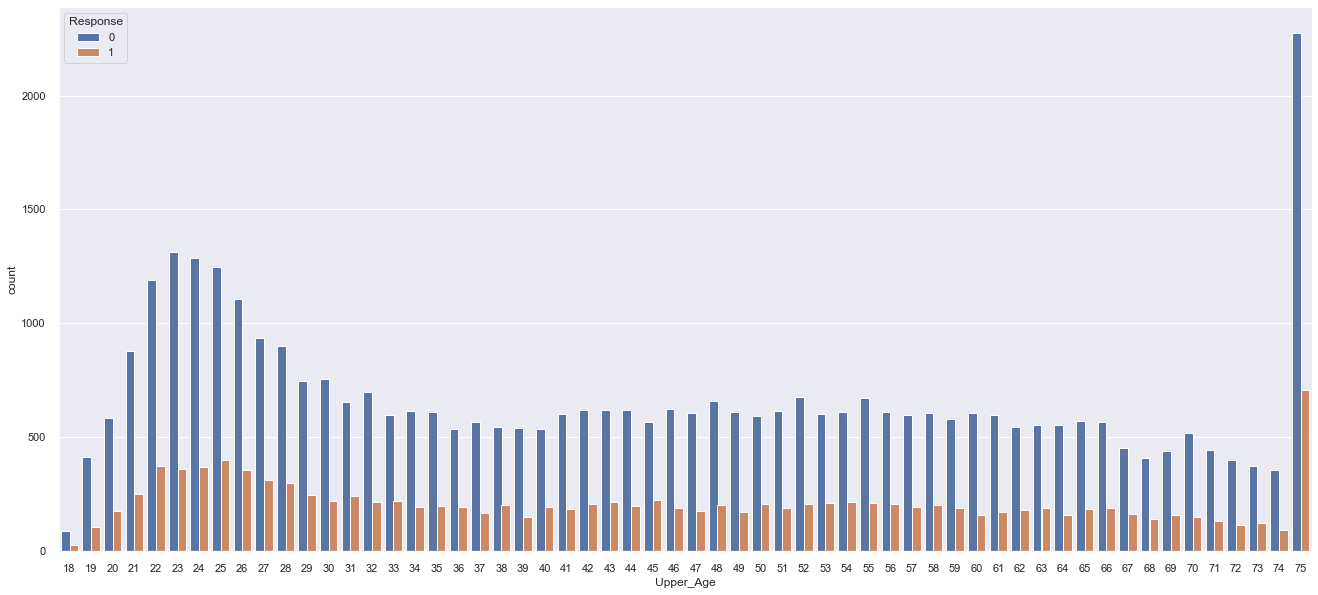

In [223]:
plt.figure(figsize=(20,10))
sns.countplot(x='Upper_Age',hue='Response',data=df3)

<AxesSubplot:xlabel='Lower_Age', ylabel='count'>

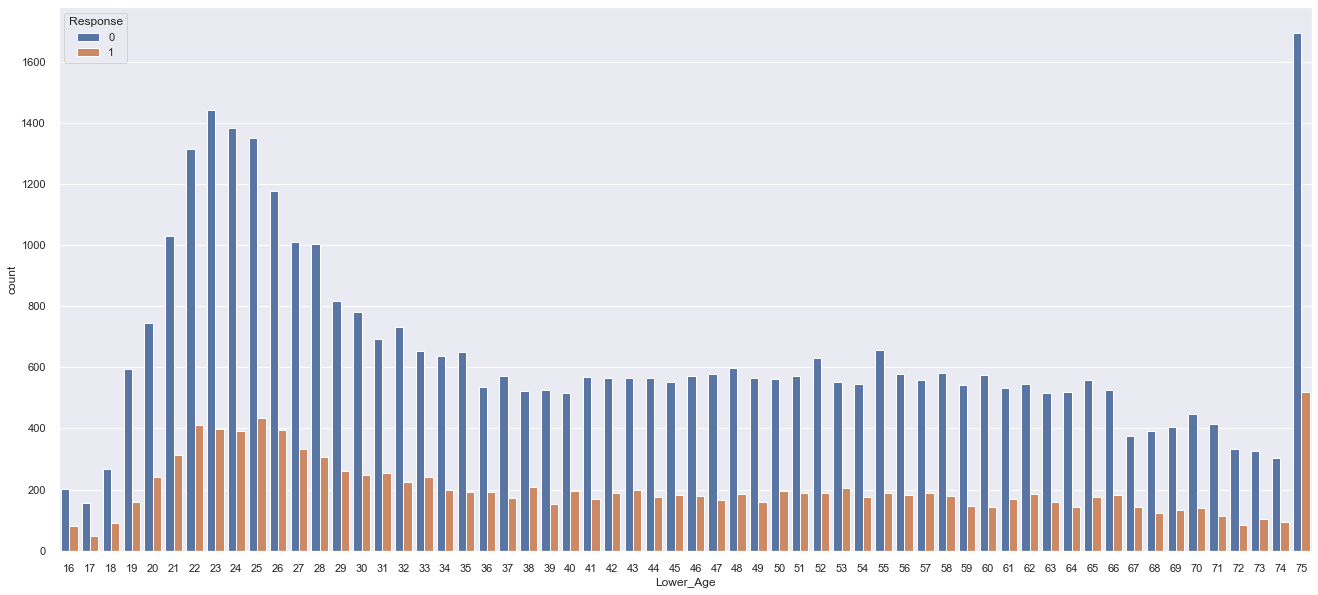

In [224]:
plt.figure(figsize=(20,10))
sns.countplot(x='Lower_Age',hue='Response',data=df3)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

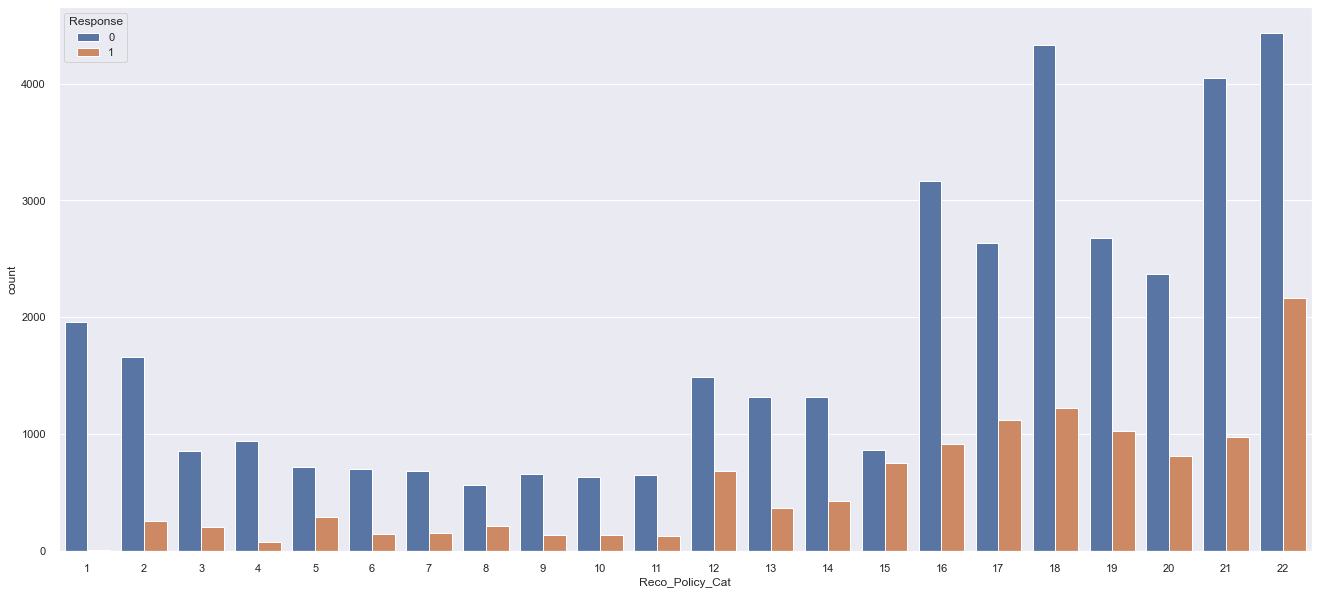

In [228]:
plt.figure(figsize=(20,10))
sns.countplot(x='Reco_Policy_Cat',hue='Response',data=df3)


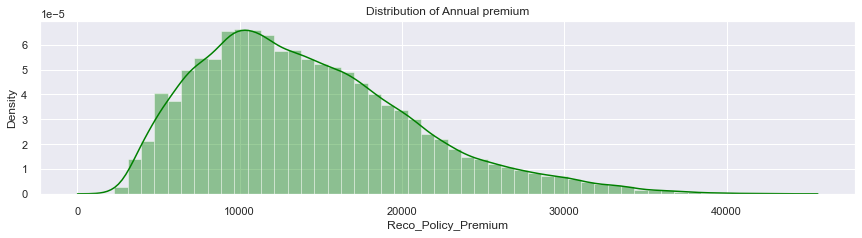

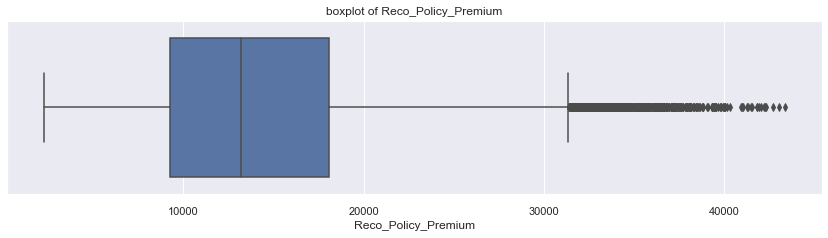

In [231]:
df3['Reco_Policy_Premium'].unique()
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df3['Reco_Policy_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df3['Reco_Policy_Premium'])
plt.title("boxplot of Reco_Policy_Premium")
plt.show()


Text(0.5, 1.05, 'Pearson correlation of Features')

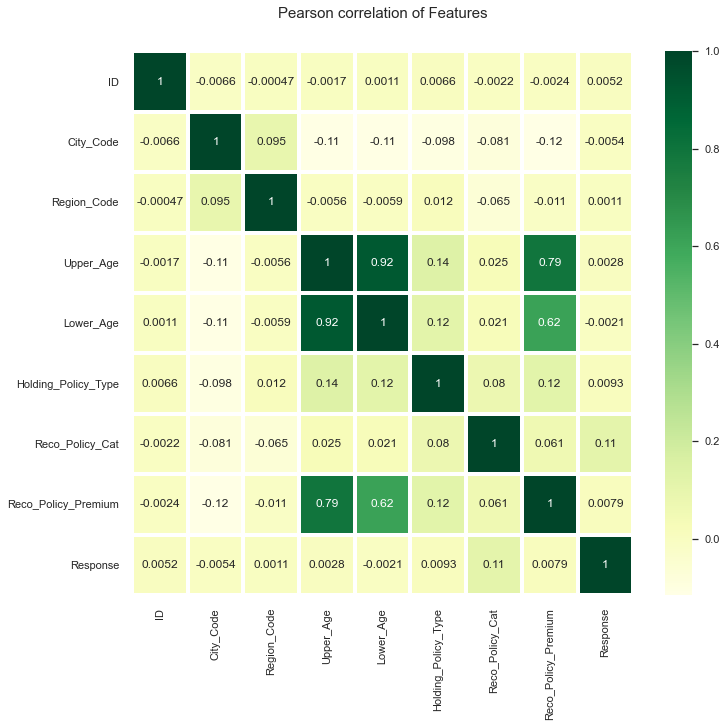

In [233]:
corr = df1.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [234]:
df4 = df1.copy()

In [235]:
df4.dtypes

ID                           int64
City_Code                    int32
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [237]:
df4['Reco_Policy_Premium'].unique()

array([11628., 30510.,  7450., ..., 25726.,  6156., 11374.])

In [238]:
bin_premium_group = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, df1['Reco_Policy_Premium'].max()]
label_bin = ['Basic-1', 'Basic-2', 'Medium-1', 'Meduim-2', 'High-1', 'High-2','Gold', 'Platinum', 'Diamond']

df4['Premium_group'] = pd.cut(df4['Reco_Policy_Premium'], bins = bin_premium_group, labels = label_bin)
df4.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Premium_group
0,1,3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,Medium-1
1,2,5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,Gold
2,3,5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,Basic-2
3,4,24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,Meduim-2
4,5,8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,Medium-1


In [242]:
print(df4['Upper_Age'].unique())
print(df4['Upper_Age'].min())
print(df4['Upper_Age'].max())

print(df4['Lower_Age'].unique())
print(df4['Lower_Age'].min())
print(df4['Lower_Age'].max())

[36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47]
18
75
[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]
16
75


In [295]:
bin_age_generation = [15, 34, 50, 69, df4['Upper_Age'].max()]
label_age_generation = ['Millenials', 'Gen X', 'Boomer', 'Silent']

df4['Generation-1'] = pd.cut(df4['Upper_Age'], bins = bin_age_generation, labels = label_age_generation)
df4['Generation-2'] = pd.cut(df4['Lower_Age'], bins = bin_age_generation, labels = label_age_generation)
df4.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Premium_group,Generation-1,Generation-2
0,1,3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,Medium-1,Gen X,Gen X
1,2,5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,Gold,Silent,Millenials
2,3,5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,Basic-2,Millenials,Millenials
3,4,24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,Meduim-2,Boomer,Gen X
4,5,8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,Medium-1,Gen X,Gen X


In [252]:
df4.drop('Generation', axis=1, inplace=True)
df4.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Premium_group,Generation-1,Generation-2
0,1,3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,Medium-1,Gen X,Gen X
1,2,5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,Gold,Silent,Millenials
2,3,5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,Basic-2,Millenials,Millenials
3,4,24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,Meduim-2,Boomer,Gen X
4,5,8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,Medium-1,Gen X,Gen X


In [253]:
df4.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Premium_group',
       'Generation-1', 'Generation-2'],
      dtype='object')

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

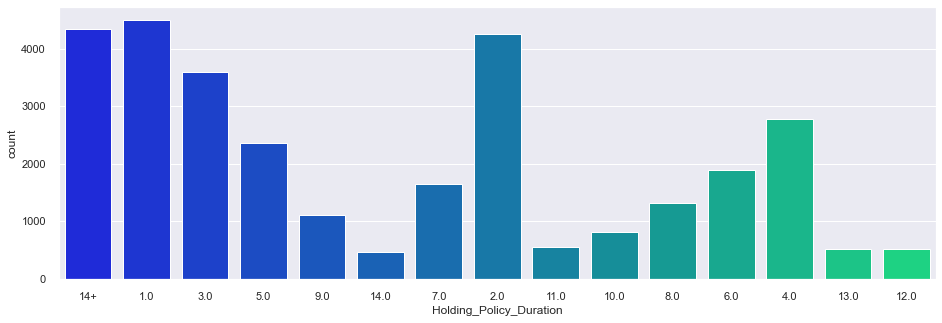

In [254]:
plt.figure(figsize = (14, 5))
sns.countplot(df4['Holding_Policy_Duration'], palette = 'winter')

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

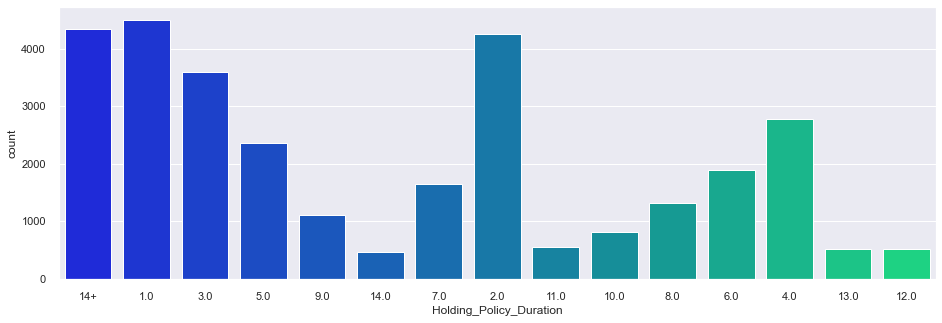

In [255]:
plt.figure(figsize = (14, 5))
sns.countplot(df4['Holding_Policy_Duration'], palette = 'winter')

In [260]:
import sidetable as stb
df4.stb.freq(['Premium_group'], cum_cols=False)


,Premium_group,count,percent
0,Medium-1,15254,29.979167
1,Basic-2,13278,26.095672
2,Meduim-2,11143,21.899689
3,High-1,5504,10.817185
4,High-2,2430,4.775756
5,Basic-1,2046,4.021068
6,Gold,985,1.935852
7,Platinum,221,0.434338
8,Diamond,21,0.041272


In [259]:
df4['Premium_group'].unique()

['Medium-1', 'Gold', 'Basic-2', 'Meduim-2', 'High-2', 'High-1', 'Basic-1', 'Platinum', 'Diamond']
Categories (9, object): ['Basic-1' < 'Basic-2' < 'Medium-1' < 'Meduim-2' ... 'High-2' < 'Gold' < 'Platinum' < 'Diamond']

<AxesSubplot:xlabel='Premium_group', ylabel='count'>

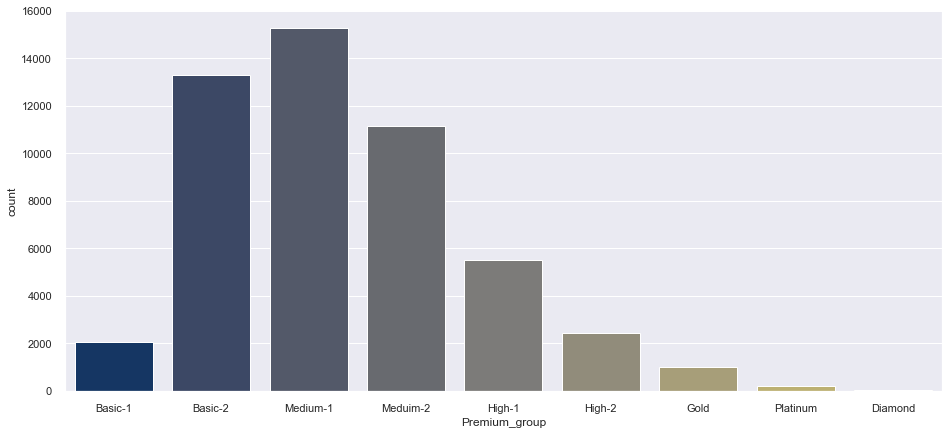

In [261]:
plt.figure(figsize = (14 ,7))
sns.countplot(df4['Premium_group'], palette = 'cividis')

In [263]:
df4.stb.freq(['Generation-1'], cum_cols=False)

,Generation-1,count,percent
0,Millenials,18350,36.063834
1,Boomer,14349,28.200542
2,Gen X,12509,24.584332
3,Silent,5674,11.151291


In [264]:
df4.stb.freq(['Generation-1'], cum_cols=False)

,Generation-1,count,percent
0,Millenials,18350,36.063834
1,Boomer,14349,28.200542
2,Gen X,12509,24.584332
3,Silent,5674,11.151291


<AxesSubplot:xlabel='Generation-1', ylabel='count'>

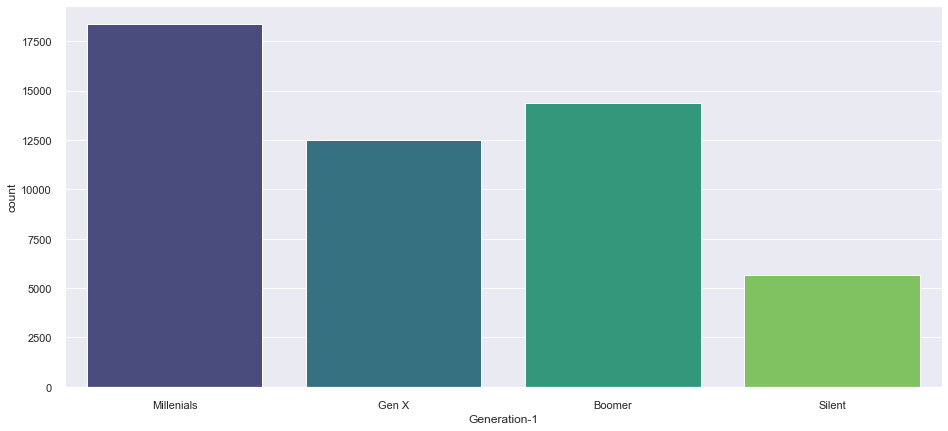

In [267]:
plt.figure(figsize = (14 ,7))
sns.countplot(df4['Generation-1'], palette = 'viridis')

<AxesSubplot:xlabel='Generation-2', ylabel='count'>

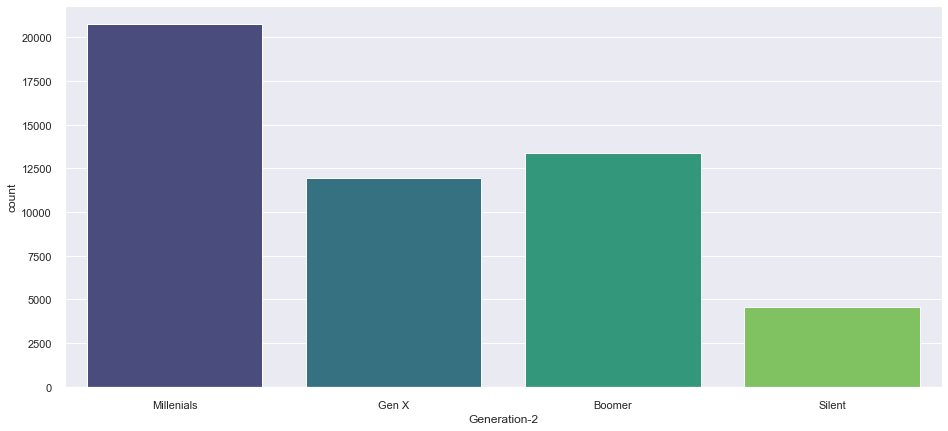

In [268]:
plt.figure(figsize = (14 ,7))
sns.countplot(df4['Generation-2'], palette = 'viridis')

In [270]:
pd.crosstab(index = df4['Response'], columns = df4['Is_Spouse'], normalize = 'index')

Is_Spouse,No,Yes
Response,,
0,0.835286,0.164714
1,0.831927,0.168073


In [271]:
df4.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Premium_group',
       'Generation-1', 'Generation-2'],
      dtype='object')

In [273]:
pd.crosstab(index = df4['Response'], columns = df4['Health Indicator'], normalize = 'columns')

Health Indicator,X1,X2,X3,X4,X5,X6,X7,X8,X9
Response,,,,,,,,,
0,0.75588,0.758904,0.763531,0.756921,0.763752,0.760156,0.683673,0.769231,0.777778
1,0.24412,0.241096,0.236469,0.243079,0.236248,0.239844,0.316327,0.230769,0.222222


In [274]:
pd.crosstab(index = df4['Response'], columns = df4['Reco_Policy_Cat'], normalize = 'columns')

Reco_Policy_Cat,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
Response,,,,,,,,,,,,,,,,,,,,,
0,0.995933,0.867501,0.806421,0.926108,0.709037,0.827262,0.814149,0.73067,0.833967,0.823377,...,0.781473,0.756028,0.534365,0.776445,0.701544,0.779399,0.723031,0.745042,0.806246,0.671615
1,0.004067,0.132499,0.193579,0.073892,0.290963,0.172738,0.185851,0.26933,0.166033,0.176623,...,0.218527,0.243972,0.465635,0.223555,0.298456,0.220601,0.276969,0.254958,0.193754,0.328385


In [278]:
pd.crosstab(index = df4['Response'], columns = [df4['Premium_group'], df4['Accomodation_Type']], normalize = 'columns')


Premium_group       Basic-1             Basic-2            Medium-1            \
Accomodation_Type     Owned    Rented     Owned    Rented     Owned    Rented   
Response                                                                        
0                  0.759174  0.781988  0.753811  0.761792  0.762086  0.766737   
1                  0.240826  0.218012  0.246189  0.238208  0.237914  0.233263   

Premium_group      Meduim-2              High-1              High-2            \
Accomodation_Type     Owned    Rented     Owned    Rented     Owned    Rented   
Response                                                                        
0                  0.756207  0.753379  0.760698  0.750189  0.753155  0.746102   
1                  0.243793  0.246621  0.239302  0.249811  0.246845  0.253898   

Premium_group          Gold            Platinum          Diamond         
Accomodation_Type     Owned    Rented     Owned   Rented   Owned Rented  
Response                                                                 
0                  0.760684  0.759036  0.730337  0.72093  0.8125    1.0  
1                  0.239316  0.240964  0.269663  0.27907  0.1875    0.0

In [279]:
pd.crosstab(index = df4['Response'], columns = df4['Generation-1'], normalize = 'columns')

Generation-1,Millenials,Gen X,Boomer,Silent
Response,,,,
0,0.76327,0.755376,0.756499,0.768946
1,0.23673,0.244624,0.243501,0.231054


In [307]:
pd.crosstab(index = df4['Response'], columns = df4['Holding_Policy_Duration'], normalize = 'columns')

Holding_Policy_Duration,1.0,10.0,11.0,12.0,13.0,14+,14.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Response,,,,,,,,,,,,,,,
0,0.778395,0.726937,0.749084,0.746589,0.729941,0.74925,0.753219,0.762676,0.767987,0.759293,0.761643,0.765048,0.742857,0.743161,0.762118
1,0.221605,0.273063,0.250916,0.253411,0.270059,0.25075,0.246781,0.237324,0.232013,0.240707,0.238357,0.234952,0.257143,0.256839,0.237882


In [283]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  int32   
 2   Region_Code              50882 non-null  int64   
 3   Accomodation_Type        50882 non-null  object  
 4   Reco_Insurance_Type      50882 non-null  object  
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  object  
 8   Health Indicator         39191 non-null  object  
 9   Holding_Policy_Duration  30631 non-null  object  
 10  Holding_Policy_Type      30631 non-null  float64 
 11  Reco_Policy_Cat          50882 non-null  int64   
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Response                 50882 non-null  int64   
 14  Premiu

In [284]:
df4['Reco_Insurance_Type'].unique()

array(['Individual', 'Joint'], dtype=object)

In [285]:
df4.describe(include = 'O')

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,39191,30631
unique,2,2,2,9,15
top,Owned,Individual,No,X1,1.0
freq,27951,40536,42460,13010,4499


In [301]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  int32   
 2   Region_Code              50882 non-null  int64   
 3   Accomodation_Type        50882 non-null  object  
 4   Reco_Insurance_Type      50882 non-null  object  
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  int64   
 8   Health Indicator         39191 non-null  object  
 9   Holding_Policy_Duration  30631 non-null  object  
 10  Holding_Policy_Type      30631 non-null  float64 
 11  Reco_Policy_Cat          50882 non-null  int64   
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Response                 50882 non-null  int64   
 14  Premiu

In [306]:
df4['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [299]:
df4['Is_Spouse'] = df4['Is_Spouse'].map({'Yes':1, 'No':0})


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Premium_group,Generation-1,Generation-2
0,1,3,3213,Rented,Individual,36,36,0,X1,14+,3.0,22,11628.0,0,Medium-1,Gen X,Gen X
1,2,5,1117,Owned,Joint,75,22,0,X2,NaN,NaN,22,30510.0,0,Gold,Silent,Millenials
2,3,5,3732,Owned,Individual,32,32,0,NaN,1.0,1.0,19,7450.0,1,Basic-2,Millenials,Millenials
3,4,24,4378,Owned,Joint,52,48,0,X1,14+,3.0,19,17780.0,0,Meduim-2,Boomer,Gen X
4,5,8,2190,Rented,Individual,44,44,0,X2,3.0,1.0,16,10404.0,0,Medium-1,Gen X,Gen X


In [303]:
df4['Accomodation_Type'] = df4['Accomodation_Type'].map({'Rented':1, 'Owned':2})

In [305]:
df4['Reco_Insurance_Type'] = df4['Reco_Insurance_Type'].map({'Individual':1, 'Joint':2})

In [309]:
df4['Holding_Policy_Duration'].fillna('0.0')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  int32   
 2   Region_Code              50882 non-null  int64   
 3   Accomodation_Type        50882 non-null  int64   
 4   Reco_Insurance_Type      50882 non-null  int64   
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  int64   
 8   Health Indicator         39191 non-null  object  
 9   Holding_Policy_Duration  30631 non-null  object  
 10  Holding_Policy_Type      30631 non-null  float64 
 11  Reco_Policy_Cat          50882 non-null  int64   
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Response                 50882 non-null  int64   
 14  Premiu

In [321]:
df4['Health Indicator'] = df4['Health Indicator'].str.lstrip('X')
df4['Health Indicator'] = df4['Health Indicator'].astype(int)
df4['Health Indicator']

ValueError: cannot convert float NaN to integer

In [323]:
df4['Health Indicator'].fillna(0)

0        1
1        2
2        0
3        1
4        2
        ..
50877    3
50878    3
50879    2
50880    2
50881    3
Name: Health Indicator, Length: 50882, dtype: object

In [312]:
df4['Premium_group'] = df4['Premium_group'].map({'Basic-1':1, 'Basic-2':2 , 'Medium-1':3, 'Meduim-2':4, 'High-1':5, 'High-2':6, 'Gold':7, 'Platinum':8, 'Diamond':9})

In [314]:
df4['Generation-1'] = df4['Generation-1'].map({'Millenials':1, 'Gen X':2, 'Boomer':3, 'Silent':4})
df4['Generation-2'] = df4['Generation-2'].map({'Millenials':1, 'Gen X':2, 'Boomer':3, 'Silent':4})

In [325]:
df4['Generation-1']

0        2
1        4
2        1
3        3
4        2
        ..
50877    1
50878    1
50879    3
50880    4
50881    1
Name: Generation-1, Length: 50882, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [329]:
df4.fillna({'Holding_Policy_Duration':0, 'Health Indicator':0, 'Holding_Policy_Type':0}, inplace=True)
df4.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Premium_group,Generation-1,Generation-2
0,1,3,3213,1,1,36,36,0,1,14+,3.0,22,11628.0,0,3,2,2
1,2,5,1117,2,2,75,22,0,2,0,0.0,22,30510.0,0,7,4,1
2,3,5,3732,2,1,32,32,0,0,1.0,1.0,19,7450.0,1,2,1,1
3,4,24,4378,2,2,52,48,0,1,14+,3.0,19,17780.0,0,4,3,2
4,5,8,2190,1,1,44,44,0,2,3.0,1.0,16,10404.0,0,3,2,2


In [342]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  int32   
 2   Region_Code              50882 non-null  int64   
 3   Accomodation_Type        50882 non-null  int64   
 4   Reco_Insurance_Type      50882 non-null  int64   
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  int64   
 8   Health Indicator         50882 non-null  int32   
 9   Holding_Policy_Duration  50882 non-null  int32   
 10  Holding_Policy_Type      50882 non-null  float64 
 11  Reco_Policy_Cat          50882 non-null  int64   
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Response                 50882 non-null  int64   
 14  Premiu

In [339]:
df4['Health Indicator'] = pd.to_numeric(df4['Health Indicator'])

In [341]:
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()
df4['Holding_Policy_Duration'] = labelEncoder.fit_transform(df4['Holding_Policy_Duration'].astype(str))


In [345]:
df4['Premium_group'] = pd.to_numeric(df4['Premium_group'])
df4['Generation-1'] = pd.to_numeric(df4['Generation-1'])
df4['Generation-2'] = pd.to_numeric(df4['Generation-2'])

In [346]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  int32  
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  int64  
 4   Reco_Insurance_Type      50882 non-null  int64  
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  int64  
 8   Health Indicator         50882 non-null  int32  
 9   Holding_Policy_Duration  50882 non-null  int32  
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
 14  Premium_group         

In [347]:
df4.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
Premium_group              0
Generation-1               0
Generation-2               0
dtype: int64

In [349]:
df4.to_csv('C:\\Users\\monis\\Desktop\\ML-Ang\\Datasets\\Health_Insurance_Lead_Prediction\\Modified_Train.csv', index=False)

In [353]:
df5 = df4[['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Generation-1', 'Generation-2', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Premium_group', 'Response'
       ]]

In [354]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  int32  
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  int64  
 4   Reco_Insurance_Type      50882 non-null  int64  
 5   Generation-1             50882 non-null  int64  
 6   Generation-2             50882 non-null  int64  
 7   Is_Spouse                50882 non-null  int64  
 8   Health Indicator         50882 non-null  int32  
 9   Holding_Policy_Duration  50882 non-null  int32  
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Premium_group            50882 non-null  int64  
 13  Response                 50882 non-null  int64  
dtypes: float64(1), int32(3


Model Report
Accuracy : 0.7744
AUC Score (Train): 0.809225


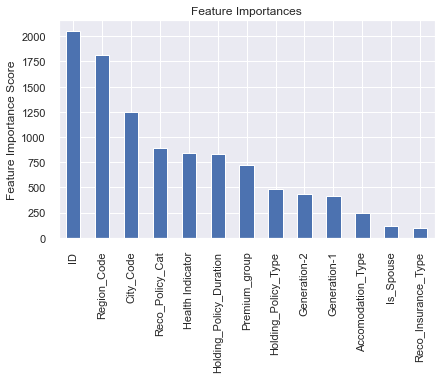

In [355]:
predictors = [x for x in df5.columns if x not in ['Response']]
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
reg_alpha=1)
modelfit(xgb5, df5, predictors)